In [25]:
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [26]:
df = pd.read_csv('data/heart.csv')

In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


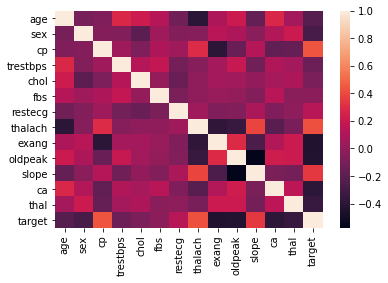

In [28]:
sns.heatmap(df.corr())

In [29]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df.target, random_state=31, test_size=0.3, stratify=df.target)

In [30]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [32]:
print(classification_report(y_train, model.predict(x_train)))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        97
           1       0.81      0.88      0.85       115

    accuracy                           0.83       212
   macro avg       0.83      0.82      0.82       212
weighted avg       0.83      0.83      0.82       212



In [33]:
print(roc_auc_score(y_train, model.predict(x_train)))

0.8205737337516807


In [34]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.80      0.85        41
           1       0.85      0.92      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.86      0.87        91
weighted avg       0.87      0.87      0.87        91



In [35]:
print(roc_auc_score(y_test, model.predict(x_test)))

0.8624390243902439


In [36]:
for o, file_name in [(model, 'model.pkl'), (scaler, 'scaler.pkl')]:
    with open(file_name, 'bw') as f:
        pickle.dump(o, f)